# Measles cases across the world

Let's load some libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
plt.rc("figure", figsize=(10, 6))

## Load data

In [2]:
# Let's load the data

cases_month = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-06-24/cases_month.csv')
cases_year = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-06-24/cases_year.csv')
cases_month.head()

,region,country,iso3,year,month,measles_suspect,measles_clinical,measles_epi_linked,measles_lab_confirmed,measles_total,rubella_clinical,rubella_epi_linked,rubella_lab_confirmed,rubella_total,discarded
0,AFR,Algeria,DZA,2012,1,8.0,6.0,0.0,2.0,8.0,NaN,NaN,NaN,NaN,0.0
1,AFR,Algeria,DZA,2012,2,10.0,10.0,0.0,0.0,10.0,NaN,NaN,NaN,NaN,0.0
2,AFR,Algeria,DZA,2012,3,17.0,17.0,0.0,0.0,17.0,NaN,NaN,NaN,NaN,0.0
3,AFR,Algeria,DZA,2012,4,7.0,5.0,0.0,0.0,5.0,0.0,0.0,1.0,1.0,2.0
4,AFR,Algeria,DZA,2012,5,14.0,11.0,0.0,0.0,11.0,0.0,0.0,3.0,3.0,3.0


In [3]:
cases_year.head()

,region,country,iso3,year,total_population,annualized_population_most_recent_year_only,total_suspected_measles_rubella_cases,measles_total,measles_lab_confirmed,measles_epi_linked,measles_clinical,measles_incidence_rate_per_1000000_total_population,rubella_total,rubella_lab_confirmed,rubella_epi_linked,rubella_clinical,rubella_incidence_rate_per_1000000_total_population,discarded_cases,discarded_non_measles_rubella_cases_per_100000_total_population
0,AFRO,Algeria,DZA,2012,37646166,37646166,76.0,55,2,0,53,1.46,13,13,0,0,0.35,8.0,0.02
1,AFRO,Algeria,DZA,2013,38414172,38414172,85.0,0,0,0,0,0.00,29,29,0,0,0.75,56.0,0.15
2,AFRO,Algeria,DZA,2014,39205031,39205031,49.0,0,0,0,0,0.00,3,3,0,0,0.08,46.0,0.12
3,AFRO,Algeria,DZA,2015,40019529,40019529,109.0,62,2,60,0,1.55,2,2,0,0,0.05,45.0,0.11
4,AFRO,Algeria,DZA,2016,40850721,40850721,93.0,49,21,27,1,1.20,11,11,0,0,0.27,33.0,0.08


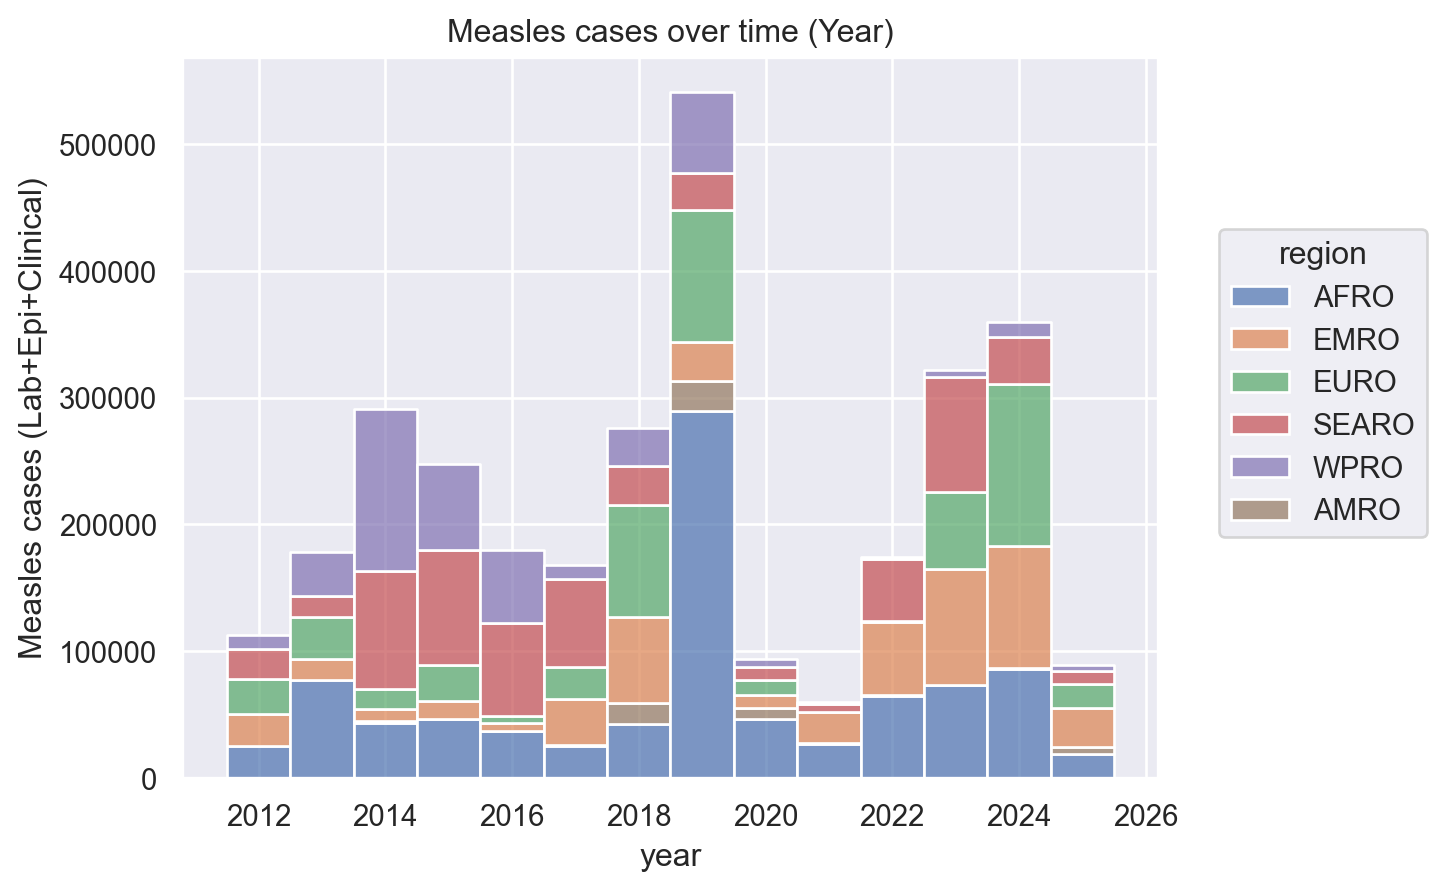

In [4]:
# How have global measles cases changed over time?
# Which regions or countries consistently report the highest measles burden?

df1 = (
    cases_year
        .pivot_table(values='measles_total',
                     index=['year', 'region'],
                     aggfunc='sum')
        .reset_index()
)

sns.set_style('whitegrid')

(
    so
        .Plot(data=df1, x='year', y='measles_total', color='region')
        .add(so.Bars(), so.Stack())
        .label(y='Measles cases (Lab+Epi+Clinical)',
               title='Measles cases over time (Year)')
)

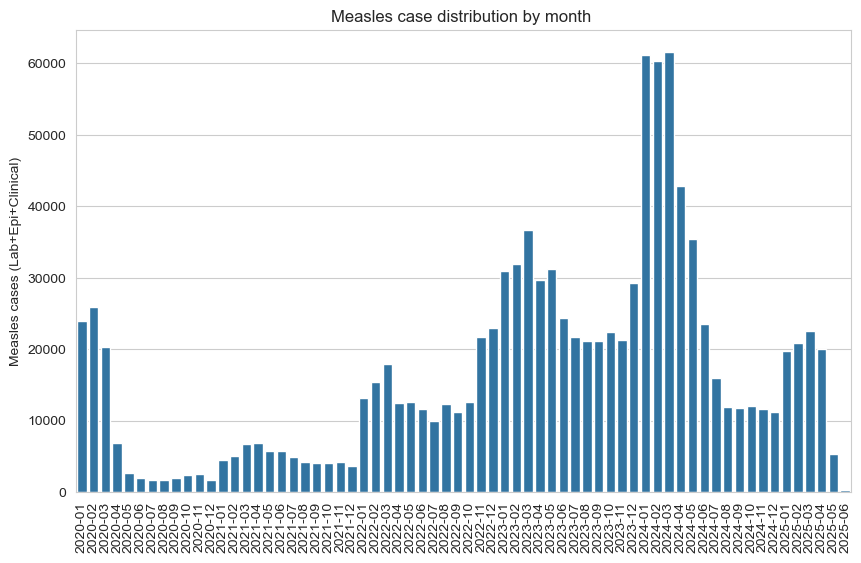

In [5]:
# Are there seasonal patterns in measles outbreaks across different regions?

pvt = (
    cases_month
    .iloc[:, [3, 4, 9]]
    .groupby(['year', 'month'])
    .sum()
    .reset_index()
)

idx = pd.PeriodIndex.from_fields(year=pvt['year'],
                                 month=pvt['month'],
                                 freq='M')
pvt.index = idx

# Graph
sns.set_style('whitegrid')
sns.barplot(pvt['measles_total'].truncate(before='2020'))
plt.xticks(rotation=90)
plt.ylabel('Measles cases (Lab+Epi+Clinical)')
plt.title('Measles case distribution by month ');

We can see that measles outbreaks have seasonal patterns across across the regions.

In [6]:
# Does the ratio of laboratory-confirmed cases to total cases reveal differences in healthcare capacity across countries?

(
    cases_year
        .iloc[:, [1, 7, 8]]
        .groupby(['country'])
        .sum()
        .assign(ratio = lambda x: x['measles_lab_confirmed'] / x['measles_total'])
        .dropna()
        .sort_values(by='ratio', ascending=False)
        .reset_index()

)

,country,measles_total,measles_lab_confirmed,ratio
0,Antigua and Barbuda,1,1,1.000000
1,Cambodia,2878,2878,1.000000
2,Chile,46,46,1.000000
3,Costa Rica,12,12,1.000000
4,Cuba,1,1,1.000000
...,...,...,...,...
164,Zimbabwe,5309,276,0.051987
165,Solomon Islands,974,15,0.015400
166,Madagascar,225947,1745,0.007723
167,Democratic People's Republic of Korea,8,0,0.000000
